# gyroのテスト

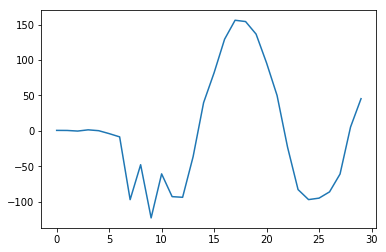

In [10]:
import smbus
import math
from time import sleep
import time

import numpy as np
import matplotlib.pyplot as plt

DEV_ADDR = 0x68

ACCEL_XOUT = 0x3b
ACCEL_YOUT = 0x3d
ACCEL_ZOUT = 0x3f
TEMP_OUT = 0x41
GYRO_XOUT = 0x43
GYRO_YOUT = 0x45
GYRO_ZOUT = 0x47

PWR_MGMT_1 = 0x6b
PWR_MGMT_2 = 0x6c   

bus = smbus.SMBus(1)
bus.write_byte_data(DEV_ADDR, PWR_MGMT_1, 0)

def read_word(adr):
    high = bus.read_byte_data(DEV_ADDR, adr)
    low = bus.read_byte_data(DEV_ADDR, adr+1)
    val = (high << 8) + low
    return val

def read_word_sensor(adr):
    val = read_word(adr)
    if (val >= 0x8000):  return -((65535 - val) + 1)
    else:  return val

def get_temp():
    temp = read_word_sensor(TEMP_OUT)
    x = temp / 340 + 36.53      # data sheet(register map)記載の計算式.
    return x

def getGyro():
    x = read_word_sensor(GYRO_XOUT)/ 131.0
    y = read_word_sensor(GYRO_YOUT)/ 131.0
    z = read_word_sensor(GYRO_ZOUT)/ 131.0
    return [x, y, z]


def getAccel():
    x = read_word_sensor(ACCEL_XOUT)/ 16384.0
    y= read_word_sensor(ACCEL_YOUT)/ 16384.0
    z= read_word_sensor(ACCEL_ZOUT)/ 16384.0
    return [x, y, z]

n=30
yaw=np.zeros(n)

for i in range(n):
    ax, ay, az = getAccel()
    gx, gy, gz = getGyro()
    #print ('{0:4.3f},   {0:4.3f},    {0:4.3f},     {0:4.3f},      {0:4.3f},      {0:4.3f},' .format(gx, gy, gz, ax, ay, az))
    #print ("yaw:", gz)
    yaw[i] = gz
    time.sleep(0.1)
    
t=np.arange(0,n)

plt.plot(t,yaw)
